<a href="https://colab.research.google.com/github/FestinBiju/Mouse-Movement-Model/blob/main/Copy_of_humanemousemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing needed libraries and Modules



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

# Function to generate synthetic mouse movement data

In [ ]:
def generate_mouse_data(num_samples):
    data = []
    for _ in range(num_samples):
        # Generate random cursor positions
        x = np.random.randint(0, 1920)  # Assuming screen resolution of 1920x1080
        y = np.random.randint(0, 1080)
        # Simulate random mouse movement
        new_x = np.clip(x + np.random.randint(-10, 11), 0, 1920)
        new_y = np.clip(y + np.random.randint(-10, 11), 0, 1080)
        data.append([x, y, new_x, new_y])  # Store cursor positions before and after movement
    return np.array(data)


# Train and evaluate the linear regression model

In [ ]:
def train_and_evaluate_model(num_samples):
    # Generate synthetic mouse movement data
    data = generate_mouse_data(num_samples)

    # Split data into features (X) and target (y)
    X = data[:, :2]  # Previous cursor position
    y = data[:, 2:]  # New cursor position after movement

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate model
    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    print("Training MSE:", train_mse)

    test_predictions = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_predictions)
    print("Testing MSE:", test_mse)

    return model

# Function to predict the next cursor position based on the current position

In [ ]:
def predict_next_position(current_position, model):
    return model.predict(current_position.reshape(1, -1))[0]

# Function to simulate mouse movement and visualize

In [ ]:
def simulate_mouse_movement(model):
    positions = []  # List to store cursor positions
    current_position = np.array([0, 0])  # Initial cursor position

    # Simulate mouse movement
    for _ in range(50):  # Simulate 50 movements
        # Predict next cursor position
        next_position = predict_next_position(current_position, model)
        positions.append(next_position)

        # Update current position
        current_position = next_position
        time.sleep(0.1)  # Adjust speed of movement as needed

    return positions

# Train the model

In [ ]:
num_samples = 1000
model = train_and_evaluate_model(num_samples)

Training MSE: 37.89621929546489
Testing MSE: 36.19657278306517


# Simulate mouse movement and visualize

In [ ]:
positions = simulate_mouse_movement(model)


# Plot mouse movements

-The Simulated Mouse Movements are shown in the below graph- 




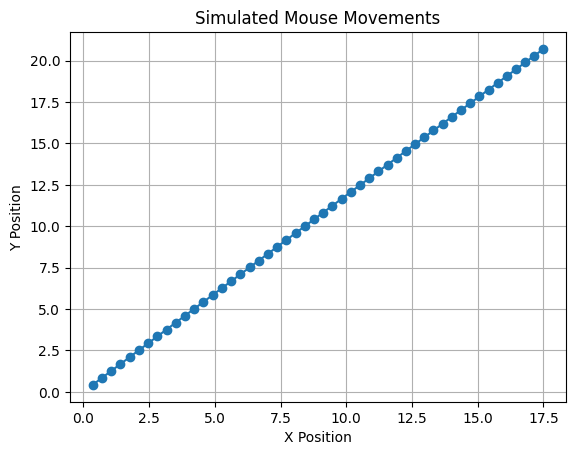

In [ ]:
print("-The Simulated Mouse Movements are shown in the below graph- \n\n")
positions = np.array(positions)
plt.plot(positions[:, 0], positions[:, 1], marker='o')
plt.title('Simulated Mouse Movements')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()